In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.shape

(100, 4)

In [9]:
df= df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


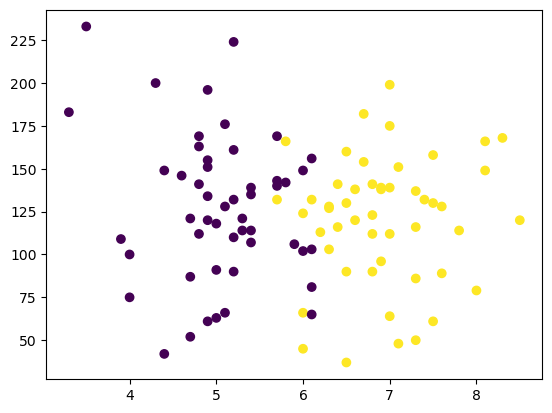

In [21]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [23]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [25]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [27]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size =0.1)

In [33]:
X_train

,cgpa,iq
53,8.3,168.0
79,6.5,90.0
10,6.0,45.0
65,8.1,166.0
50,3.5,233.0
...,...,...
60,6.9,139.0
19,5.2,132.0
93,6.8,112.0
15,5.1,176.0


In [35]:
Y_train

53    1
79    1
10    1
65    1
50    0
     ..
60    1
19    0
93    1
15    0
13    1
Name: placement, Length: 90, dtype: int64

In [37]:
X_test

,cgpa,iq
95,4.3,200.0
20,6.6,120.0
11,6.9,138.0
73,4.9,61.0
99,6.2,113.0
4,5.8,142.0
89,4.9,151.0
23,4.7,87.0
16,5.2,224.0
22,4.9,120.0


In [39]:
Y_test

95    0
20    1
11    1
73    0
99    1
4     0
89    0
23    0
16    0
22    0
Name: placement, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scalar = StandardScaler()

In [45]:
X_train = scalar.fit_transform(X_train)

In [47]:
X_train

array([[ 1.95360846,  1.1806051 ],
       [ 0.38917657, -0.83198543],
       [-0.04538784, -1.99309535],
       [ 1.77978269,  1.12900021],
       [-2.2182099 ,  2.85776387],
       [ 0.56300234,  1.5418393 ],
       [-0.7406909 ,  0.999988  ],
       [ 0.56300234,  0.8193709 ],
       [-1.43599396,  0.69035869],
       [-1.08834243,  1.20640754],
       [-1.26216819,  0.61295136],
       [ 0.21535081,  0.12270495],
       [-0.56686513,  0.43233426],
       [-0.56686513, -0.2127268 ],
       [ 0.47608946,  0.40653182],
       [-1.17525531, -1.81247825],
       [-0.13230072, -0.41914635],
       [ 0.04152504,  0.25171716],
       [-1.08834243,  0.48393915],
       [-1.08834243, -0.26433169],
       [-0.7406909 , -0.83198543],
       [-1.87055837, -0.34173902],
       [ 1.51904405, -0.2127268 ],
       [ 2.12743422, -0.05791215],
       [ 1.08447963, -0.16112192],
       [-0.91451666, -1.52865138],
       [-1.78364549, -0.573961  ],
       [ 1.34521828,  0.14850739],
       [ 1.17139252,

In [49]:
X_test= scalar.transform(X_test)

In [51]:
X_test

array([[-1.52290684,  2.00628326],
       [ 0.47608946, -0.05791215],
       [ 0.7368281 ,  0.40653182],
       [-1.00142955, -1.58025627],
       [ 0.12843793, -0.23852925],
       [-0.2192136 ,  0.50974159],
       [-1.00142955,  0.74196357],
       [-1.17525531, -0.90939276],
       [-0.7406909 ,  2.62554189],
       [-1.00142955, -0.05791215]])

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression()

In [57]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [65]:
y_pred=clf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(Y_test,y_pred)


1.0

In [88]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.9 MB/s eta 0:00:00


In [90]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

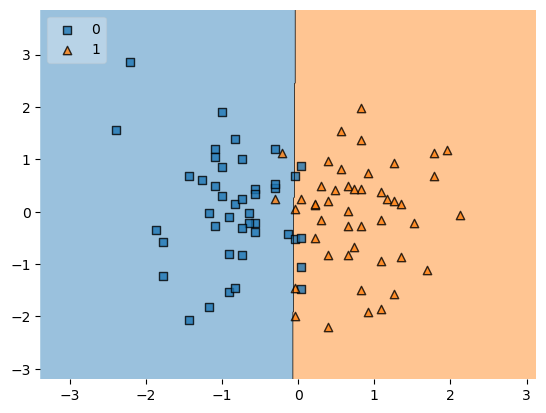

In [92]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [94]:
import pickle

In [96]:
pickle.dump(clf,open('model.pkl','wb'))